In [14]:
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12.0,8.0]

In [15]:
sales=pd.read_csv('sales.csv')
sales

,Month,Sales
0,1/1/2019,625
1,2/1/2019,613
2,3/1/2019,891
3,4/1/2019,660
4,5/1/2019,941
5,6/1/2019,878
6,7/1/2019,585
7,8/1/2019,550
8,9/1/2019,819
9,10/1/2019,359


In [4]:
sales.isnull().sum()

Month    0
Sales    0
dtype: int64

In [16]:
sales.dtypes

Month    object
Sales     int64
dtype: object

In [17]:
sales['Month']=pd.to_datetime(sales['Month'])

In [18]:
sales.dtypes

Month    datetime64[ns]
Sales             int64
dtype: object

In [19]:
sales=sales.set_index('Month')
sales.head()

,Sales
Month,
2019-01-01,625
2019-02-01,613
2019-03-01,891
2019-04-01,660
2019-05-01,941


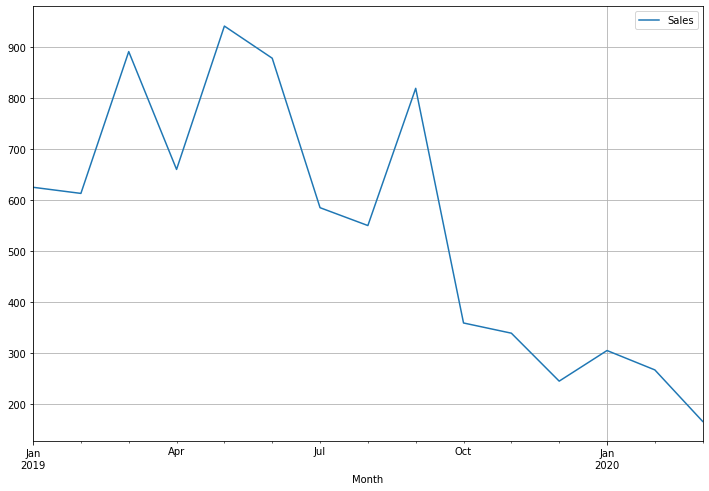

In [20]:
sales.plot(grid=True)

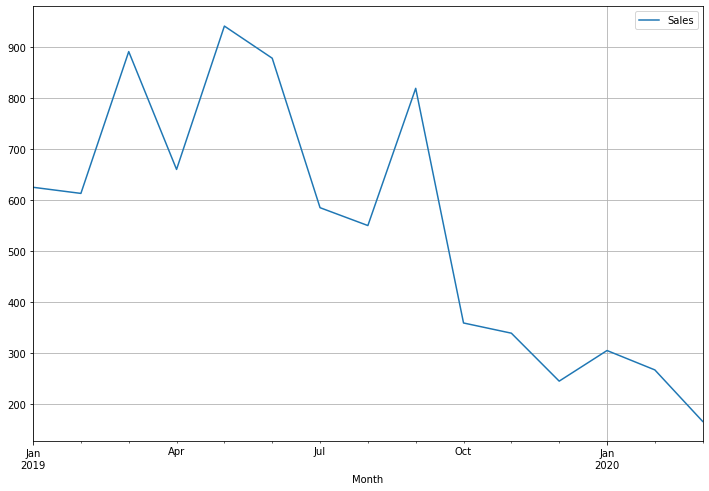

In [22]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2019, 1, 1)
end_date=datetime(2020, 12, 1)
sales[(start_date <= sales.index) & (sales.index <= end_date)].plot(grid=True)

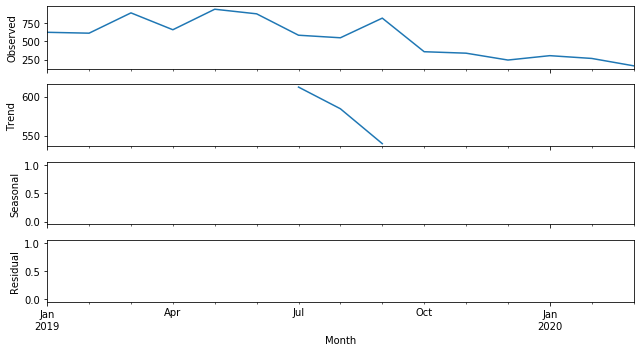

In [26]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(sales, model='multiplicative')
fig=decomposition.plot()
matplotlib.rcParams['figure.figsize']=[9.0,5.0]

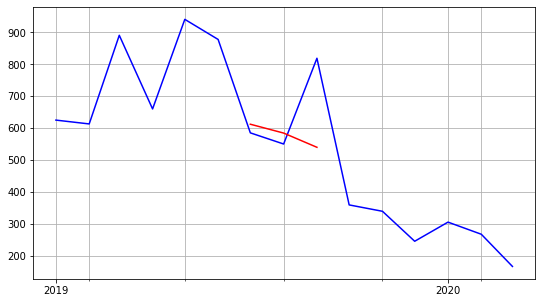

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(sales.index, sales['Sales'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')